In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15914,27348,1.012816,-0.626216,0.416264,0.486541,-0.742699,0.049411,-0.338169,0.062332,-1.337575,...,-0.280929,-0.599352,-0.009526,-0.027785,0.247413,-0.448223,0.039052,0.039950,128.00,0.0
880,666,-0.794271,0.971305,0.943319,-0.043722,-0.258737,-0.333043,0.564873,0.543874,-0.980243,...,-0.214068,-0.974297,0.426295,0.142414,-0.911745,-0.237001,-0.035277,0.088817,64.63,0.0
2722,2265,-1.266171,-0.321459,1.784605,-2.404879,-1.251838,-0.348121,-0.675538,0.489034,-2.540517,...,0.085012,0.446617,-0.090068,0.095560,0.434890,-0.147216,0.196593,0.023946,69.00,0.0
11437,19895,1.439836,-0.543379,0.413579,-0.353235,-0.922562,-0.531291,-0.762251,-0.131839,1.104486,...,-0.224855,-0.366404,-0.060696,-0.190265,0.551491,-0.246219,-0.022361,-0.002347,5.00,0.0
97,67,-0.653445,0.160225,1.592256,1.296832,0.997175,-0.343000,0.469937,-0.132470,-0.197794,...,0.038363,0.336449,-0.014883,0.102959,-0.265322,-0.348637,0.011238,-0.049478,19.85,0.0
18097,29181,1.258893,-0.774222,0.138968,-0.719268,-1.031363,-0.613180,-0.497281,-0.009295,-0.915173,...,-0.546637,-1.384662,0.111164,-0.040963,-0.018106,0.807567,-0.087035,0.004459,68.36,0.0
4332,3760,1.325005,-0.809991,-0.959412,-1.584234,1.419297,3.288968,-1.117940,0.700098,0.355454,...,-0.254165,-0.919116,0.046413,0.922049,0.342520,-0.512596,-0.027397,0.022321,81.48,0.0
19143,30046,-1.517890,1.390935,1.547316,-1.810139,0.112843,-0.396828,1.050197,-0.584720,1.697975,...,-0.380199,-0.064776,-0.056441,0.225076,-0.212513,0.623944,0.020341,-0.478085,1.38,0.0
9640,14445,-0.311399,0.436721,1.650909,-0.742563,0.657334,0.803829,0.343039,-0.042663,0.942757,...,-0.004245,0.380401,-0.250753,-1.113879,-0.177122,1.042609,-0.195272,-0.197971,39.00,0.0
20769,31260,-0.853173,0.182812,1.504038,0.296234,0.636319,-0.200917,1.084422,-0.100935,-0.257510,...,0.026518,0.058017,-0.047279,-0.029394,0.191140,-0.550904,-0.099572,-0.098065,98.50,0.0


In [8]:
df.shape

(9965, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

# Data Visualization


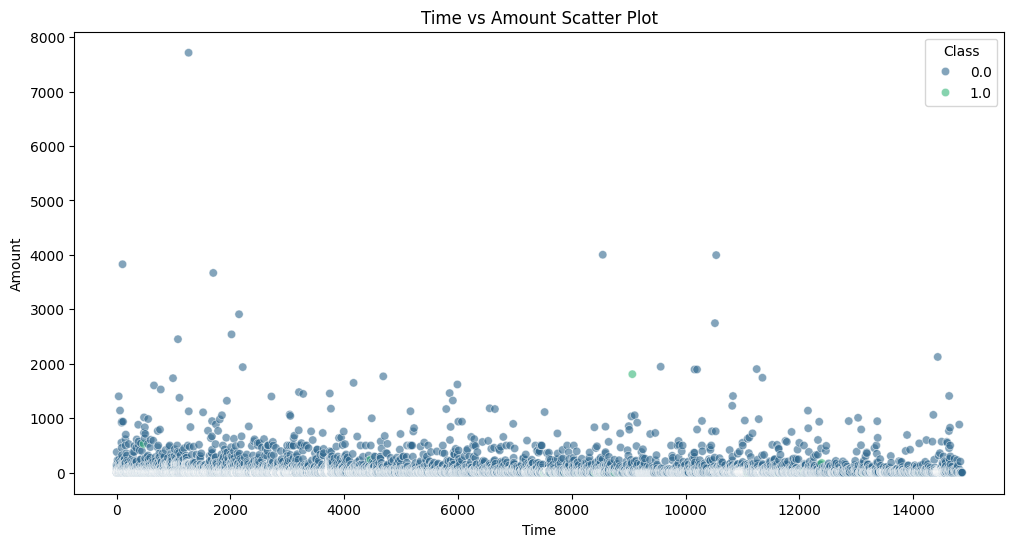

In [10]:
# 1. Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()


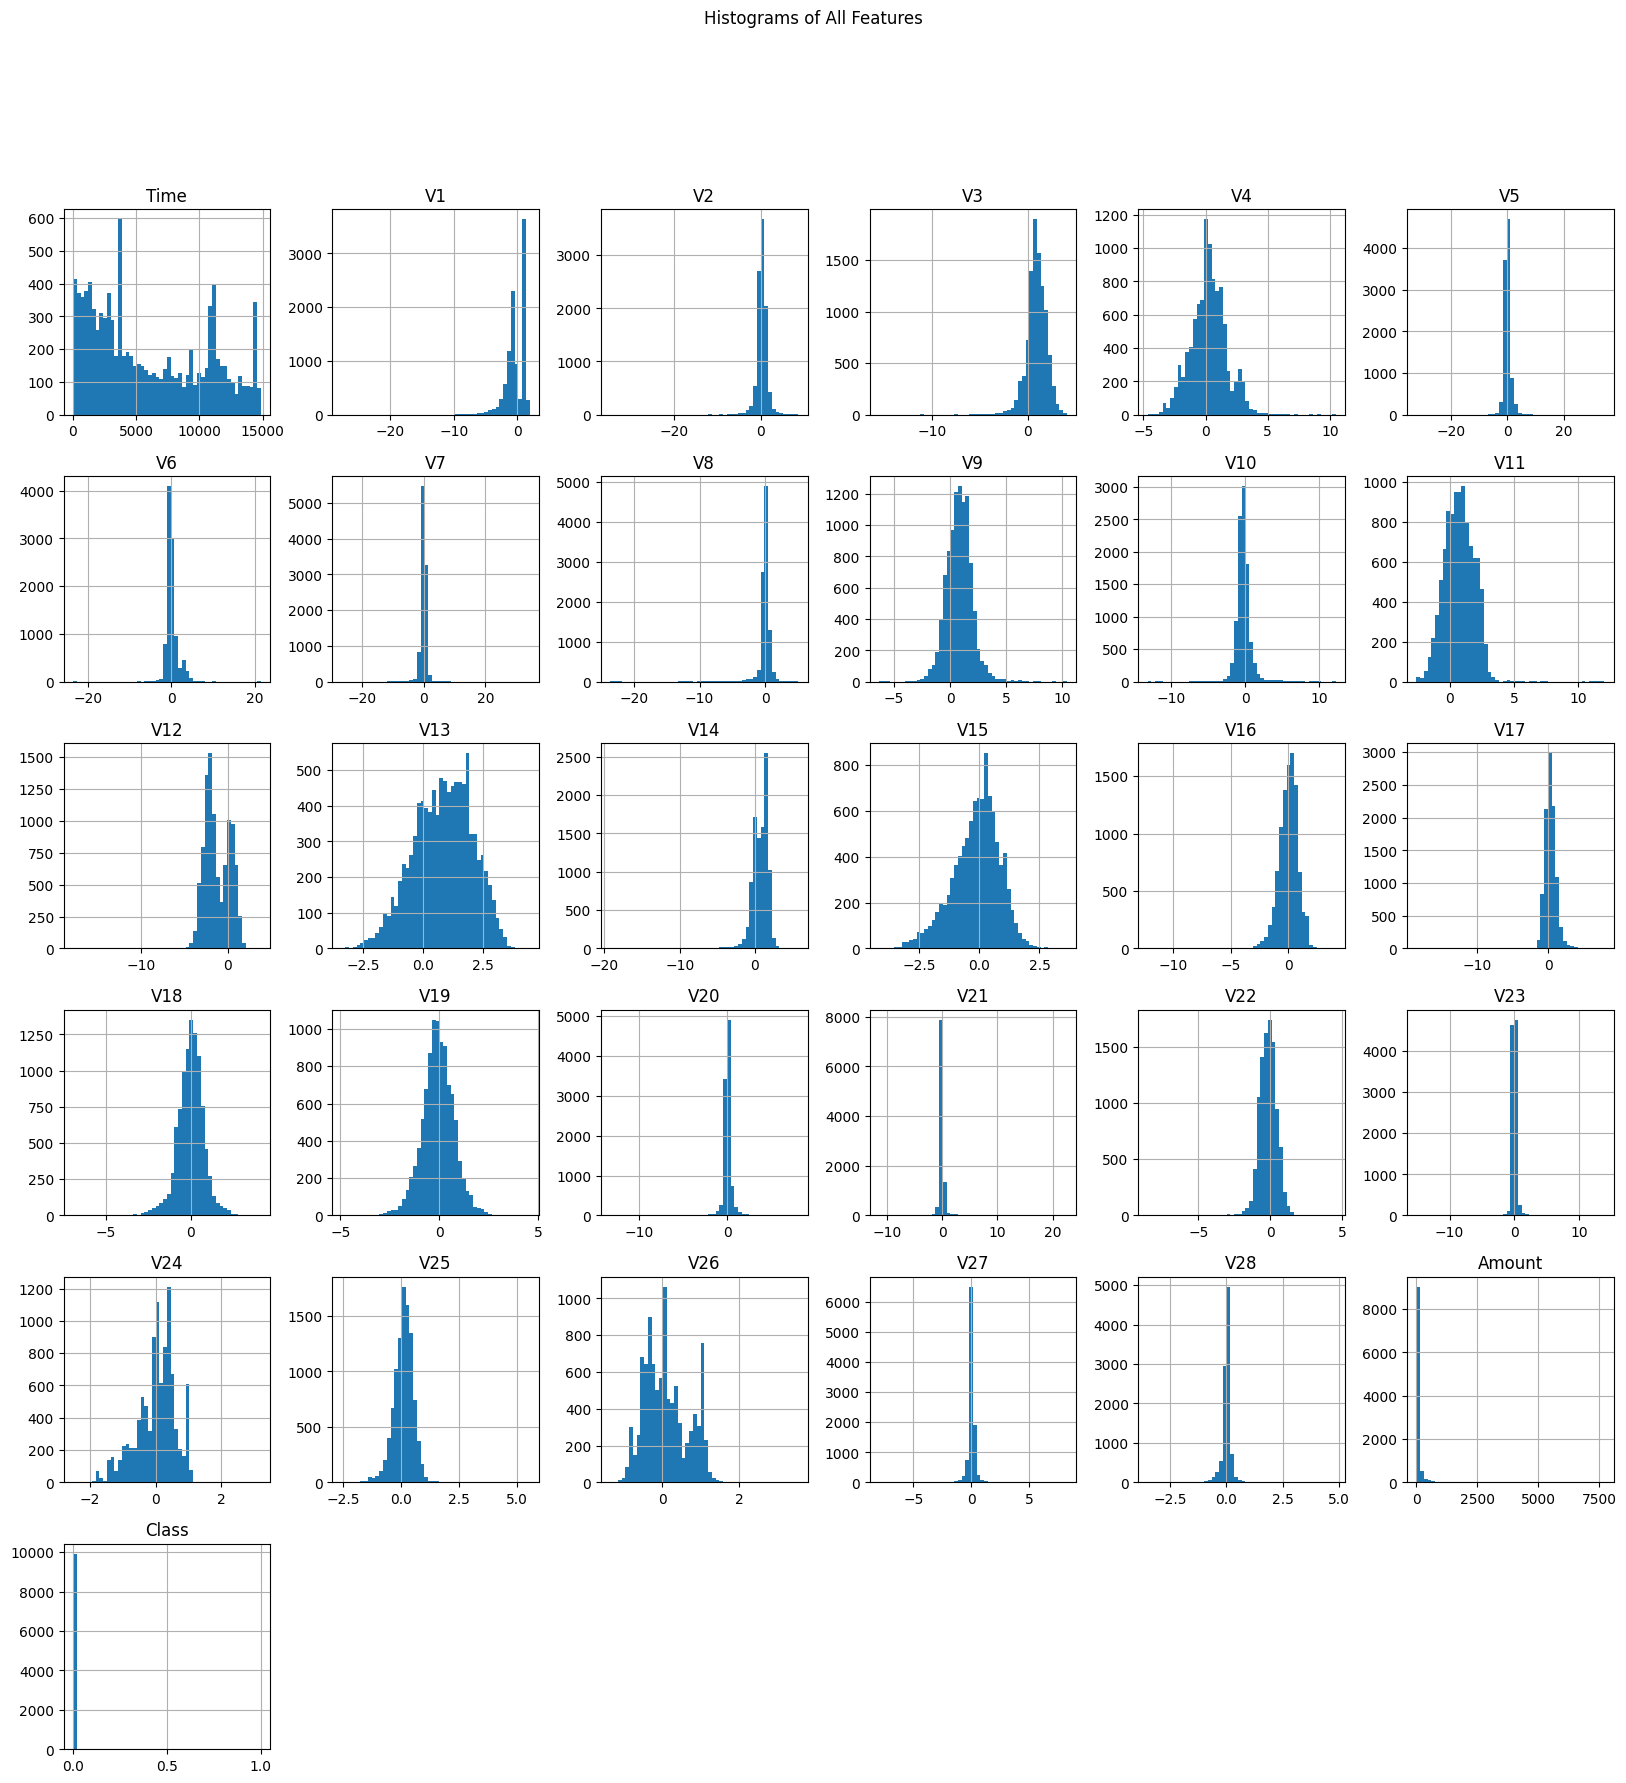

In [11]:
# 2. Histograms of the features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

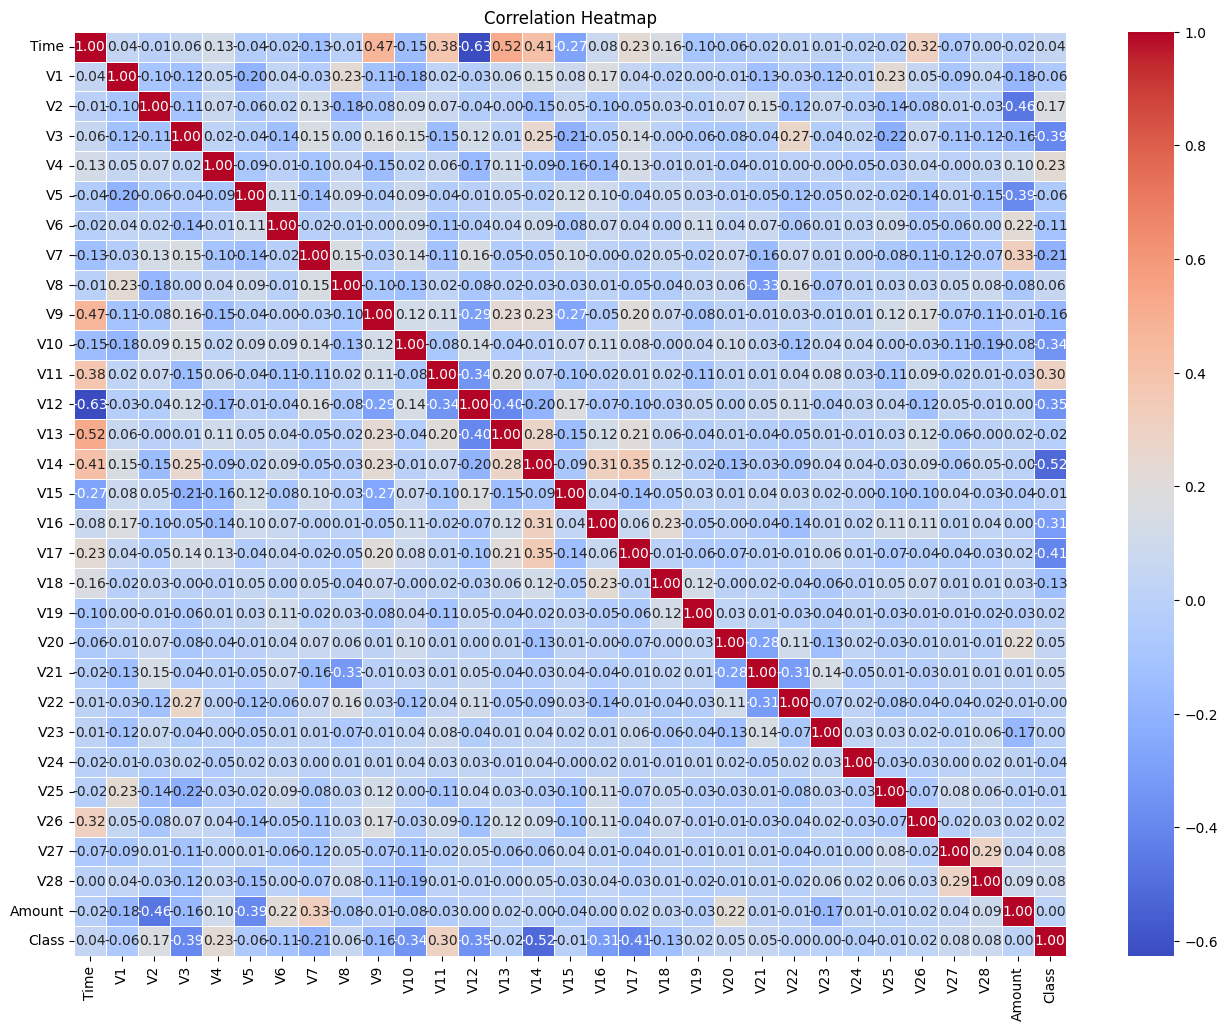

In [12]:
# 3. Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#train test


In [33]:
X = df.drop('Class',axis=1)
y = df['Class']

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
# Drop rows with any missing values in X_train and y_train
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]  # Align y_train with cleaned X_train

# Fit the model on the cleaned data
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_cleaned, y_train_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [36]:
y_pred = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

In [37]:
# Predicting for Training and Testing data
y_train_pred = log_reg_model.predict(X_train_cleaned)
y_test_pred = log_reg_model.predict(X_test)

# Calculating Training and Testing accuracy
train_accuracy = accuracy_score(y_train_cleaned, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# If the model is overfitting, the training accuracy will be high, but the testing accuracy will be low
# If the model is underfitting, both accuracies will be low

Training Accuracy: 1.0
Testing Accuracy: 0.9989964877069744


In [38]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



In [39]:
rows_count=len(y_pred_prob)
print(f"Number of rows in X_train_cleaned: {rows_count}")

Number of rows in X_train_cleaned: 1993


In [47]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc}")


# ROC Curve
#from sklearn.metrics import roc_curve

#fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, marker='.', label=f'ROC AUC = {roc_auc:.3f}')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC Curve')
#plt.legend()
#plt.grid()
#plt.show()




ROC-AUC Score: 0.9874551971326164


In [48]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve: {auprc}")

# Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, marker='.', label=f'AUPRC = {auprc:.3f}')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.grid()
# plt.show()

Area Under the Precision-Recall Curve: 0.8929505204479307


Confusion Matrix:
[[1984    0]
 [   2    7]]


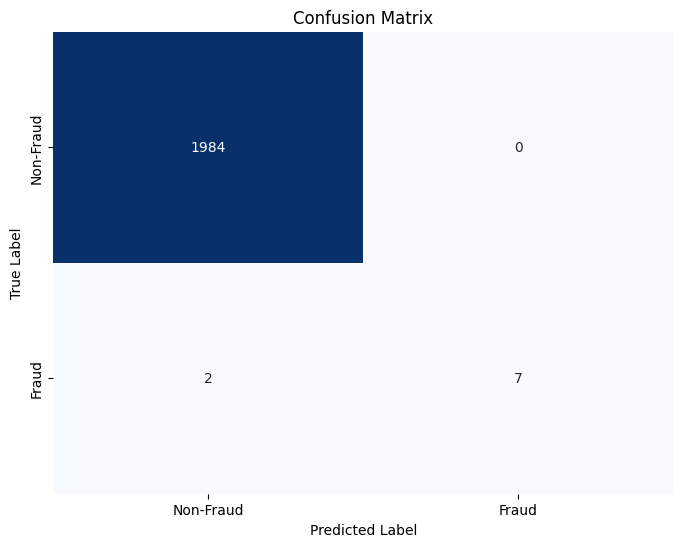

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix ni
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()